이한음님은 게임 회사의 데이터 팀에 합류했습니다.

다음 분기에 어떤 게임을 설계해야 할까

라는 고민을 해결하기 위해, 기존의 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 하는 것이 여러분의 목표입니다.

In [1]:
from google.colab import files
file = files.upload()

Saving vgames2.csv to vgames2 (1).csv


In [2]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(file['vgames2.csv']), encoding='UTF8')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
# 데이터 기본정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [4]:
# 데이터 결측치 확인
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [5]:
# 16598 개의 데이터중 379 개의 데이터가 년도, 장르, 제작회사를 모르므로 일단 제외
df2 = df.dropna()
df2

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [6]:
df2.isnull().sum()

Unnamed: 0     0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [7]:
# 이상치 확인을 위한 최대값 최소값 확인
import heapq
print(heapq.nlargest(20, df2['Year']))
print(heapq.nsmallest(20, df2['Year']))

[2020.0, 2017.0, 2017.0, 2017.0, 2016.0, 2016.0, 2016.0, 2016.0, 2016.0, 2016.0, 2016.0, 2016.0, 2016.0, 2016.0, 2016.0, 2016.0, 2016.0, 2016.0, 2016.0, 2016.0]
[0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 5.0]


In [8]:
# 년도에 0 값이 들어 있는 행 확인
years = df2['Year'] == 0
yresult = df2[years]
yresult

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9276,9277,Trade & Battle: Card Hero,GB,0.0,Strategy,Nintendo,0,0,0.2,0
14666,14667,Strider 2,PS,0.0,Platform,Virgin Interactive,0.05,0.03,0,0.01
16394,16395,Point Blank 3,PS,0.0,Shooter,Namco Bandai Games,0.01,0.01,0,0


In [9]:
# 혹시 2000년일까 해서 2000년 자료 확인
years2 = df2['Year'] == 2000
yresult2 = df2[years2]
yresult2

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
29,30,McGrath Vs. Pastrana Freestyle Motocross,PS,2000.0,Racing,Acclaim Entertainment,0.14,0.1,0,0.02
40,41,Vagrant Story,PS,2000.0,Role-Playing,Crave Entertainment,0.3,0.2,0.3,0.06
77,78,Buzz Lightyear of Star Command,PS,2000.0,Platform,Activision,0.35,0.24,0,0.04
84,85,Tom and Jerry in Fists of Furry,N64,2000.0,Fighting,Ubisoft,0.13,0.03,0,0
107,108,Madden NFL 2001,PS2,2000.0,Sports,Electronic Arts,1.19,0.07,0.05,0.2
...,...,...,...,...,...,...,...,...,...,...
16437,16438,Disney's Donald Duck: Goin' Quackers,N64,2000.0,Platform,Ubisoft,0.08,0.02,0,0
16444,16445,Midway's Greatest Arcade Hits Volume 1,N64,2000.0,Misc,Midway Games,0.19,0.05,0,0
16446,16447,J-League Jikkyou Winning Eleven 2000,PS,2000.0,Sports,Konami Digital Entertainment,0,0,0.15,0.01
16479,16480,Crash Bash,PS,2000.0,Misc,Sony Computer Entertainment,1.56,1.47,0.19,0.17


In [10]:
# 년도별 자료갯수 확인
pd.set_option('display.max_row', 500)
df2['Year'].sort_values().value_counts()

2009.0    1418
2008.0    1413
2010.0    1246
2007.0    1192
2011.0    1123
2006.0     998
2005.0     930
2002.0     823
2003.0     767
2004.0     736
2012.0     650
2015.0     606
2014.0     578
2013.0     543
2001.0     478
1998.0     374
2000.0     345
2016.0     337
1999.0     336
1997.0     287
1996.0     259
1995.0     215
1994.0     120
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      20
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
11.0        10
9.0         10
8.0         10
1980.0       8
3.0          7
10.0         7
6.0          7
15.0         5
16.0         5
4.0          4
5.0          4
95.0         4
2.0          3
7.0          3
0.0          3
96.0         3
98.0         3
2017.0       3
12.0         2
14.0         2
97.0         2
13.0         2
1.0          2
2020.0       1
94.0         1
86.0         1
Name: Year, dtype: int64

In [11]:
# 년도가 어떤 데이터로 이루어져 있는지 확인
df2['Year'].drop_duplicates().sort_values()

9276        0.0
2249        1.0
8144        2.0
768         3.0
2548        4.0
2467        5.0
1364        6.0
3879        7.0
1684        8.0
74          9.0
3044       10.0
213        11.0
10811      12.0
8550       13.0
4727       14.0
304        15.0
4010       16.0
4365       86.0
15985      94.0
4807       95.0
906        96.0
81         97.0
3492       98.0
5723     1980.0
664      1981.0
210      1982.0
466      1983.0
37       1984.0
59       1985.0
1768     1986.0
156      1987.0
540      1988.0
801      1989.0
260      1990.0
373      1991.0
346      1992.0
99       1993.0
236      1994.0
86       1995.0
26       1996.0
21       1997.0
46       1998.0
70       1999.0
29       2000.0
10       2001.0
20       2002.0
11       2003.0
28       2004.0
5        2005.0
14       2006.0
8        2007.0
0        2008.0
1        2009.0
2        2010.0
6        2011.0
110      2012.0
24       2013.0
17       2014.0
18       2015.0
56       2016.0
5310     2017.0
6906     2020.0
Name: Ye

In [12]:
df2 = df2.replace({0:2000})
df2 = df2.replace({1:2001})
df2 = df2.replace({2:2002})
df2 = df2.replace({3:2003})
df2 = df2.replace({4:2004})
df2 = df2.replace({5:2005})
df2 = df2.replace({6:2006})
df2 = df2.replace({7:2007})
df2 = df2.replace({8:2008})
df2 = df2.replace({9:2009})
df2 = df2.replace({10:2010})
df2 = df2.replace({11:2011})
df2 = df2.replace({12:2012})
df2 = df2.replace({13:2013})
df2 = df2.replace({14:2014})
df2 = df2.replace({15:2015})
df2 = df2.replace({16:2016})
df2 = df2.replace({86:1984})
df2 = df2.replace({94:1994})
df2 = df2.replace({95:1995})
df2 = df2.replace({96:1996})
df2 = df2.replace({97:1997})
df2 = df2.replace({98:1998})
df2['Year'].drop_duplicates().sort_values()

5723    1980.0
664     1981.0
210     1982.0
466     1983.0
37      1984.0
59      1985.0
1768    1986.0
156     1987.0
540     1988.0
801     1989.0
260     1990.0
373     1991.0
346     1992.0
99      1993.0
236     1994.0
86      1995.0
26      1996.0
21      1997.0
46      1998.0
70      1999.0
29      2000.0
10      2001.0
20      2002.0
11      2003.0
28      2004.0
5       2005.0
14      2006.0
8       2007.0
0       2008.0
1       2009.0
2       2010.0
6       2011.0
110     2012.0
24      2013.0
17      2014.0
18      2015.0
56      2016.0
5310    2017.0
6906    2020.0
Name: Year, dtype: float64

In [13]:
# 잘못 입력된 년도 수정
df2['Year'].value_counts()

2009.0    1428
2008.0    1423
2010.0    1253
2007.0    1195
2011.0    1133
2006.0    1005
2005.0     934
2002.0     826
2003.0     774
2004.0     740
2012.0     652
2015.0     611
2014.0     580
2013.0     545
2001.0     480
1998.0     377
2000.0     348
2016.0     342
1999.0     336
1997.0     289
1996.0     262
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      20
1983.0      17
1989.0      17
1987.0      16
1990.0      16
1984.0      15
1988.0      15
1985.0      14
1980.0       8
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [14]:
# 다시 이상치 확인
print(heapq.nlargest(20, df2['Year']))
print(heapq.nsmallest(20, df2['Year']))

[2020.0, 2017.0, 2017.0, 2017.0, 2016.0, 2016.0, 2016.0, 2016.0, 2016.0, 2016.0, 2016.0, 2016.0, 2016.0, 2016.0, 2016.0, 2016.0, 2016.0, 2016.0, 2016.0, 2016.0]
[1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1981.0, 1981.0, 1981.0, 1981.0, 1981.0, 1981.0, 1981.0, 1981.0, 1981.0, 1981.0, 1981.0, 1981.0]


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16241 non-null  int64  
 1   Name         16241 non-null  object 
 2   Platform     16241 non-null  object 
 3   Year         16241 non-null  float64
 4   Genre        16241 non-null  object 
 5   Publisher    16241 non-null  object 
 6   NA_Sales     16241 non-null  object 
 7   EU_Sales     16241 non-null  object 
 8   JP_Sales     16241 non-null  object 
 9   Other_Sales  16241 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


In [16]:
del df2['Unnamed: 0']

In [20]:
df2['NA_Sales'] = df2['NA_Sales'].str.replace('M','')
df2['EU_Sales'] = df2['EU_Sales'].str.replace('M','')
df2['JP_Sales'] = df2['JP_Sales'].str.replace('M','')
df2['Other_Sales'] = df2['Other_Sales'].str.replace('M','')

for i in df2['NA_Sales']:
  if 'K' in i:
    temp = i.replace('K', '')
    temp = float(temp)
    temp = temp * 0.001
    temp = str(temp)
    df2['NA_Sales'] = df2['NA_Sales'].replace(i, temp)

for i in df2['EU_Sales']:
  if 'K' in i:
    temp = i.replace('K', '')
    temp = float(temp)
    temp = temp * 0.001
    temp = str(temp)
    df2['EU_Sales'] = df2['EU_Sales'].replace(i, temp)

for i in df2['JP_Sales']:
  if 'K' in i:
    temp = i.replace('K', '')
    temp = float(temp)
    temp = temp * 0.001
    temp = str(temp)
    df2['JP_Sales'] = df2['JP_Sales'].replace(i, temp)

for i in df2['Other_Sales']:
  if 'K' in i:
    temp = i.replace('K', '')
    temp = float(temp)
    temp = temp * 0.001
    temp = str(temp)
    df2['Other_Sales'] = df2['Other_Sales'].replace(i, temp)

df2['NA_Sales'] = pd.to_numeric(df2['NA_Sales'])
df2['EU_Sales'] = pd.to_numeric(df2['EU_Sales'])
df2['JP_Sales'] = pd.to_numeric(df2['JP_Sales'])
df2['Other_Sales'] = pd.to_numeric(df2['Other_Sales'])

In [21]:
df2['Year'].drop_duplicates()

0        1980.0
8        1981.0
54       1982.0
90       1983.0
107      1984.0
122      1985.0
136      1986.0
156      1987.0
172      1988.0
187      1989.0
204      1990.0
220      1991.0
261      1992.0
304      1993.0
364      1994.0
485      1995.0
704      1996.0
966      1997.0
1255     1998.0
1632     1999.0
1968     2000.0
2316     2001.0
2796     2002.0
3622     2003.0
4396     2004.0
5136     2005.0
6070     2006.0
7075     2007.0
8270     2008.0
9693     2009.0
11121    2010.0
12374    2011.0
13507    2012.0
14159    2013.0
14704    2014.0
15284    2015.0
15895    2016.0
16237    2017.0
16240    2020.0
Name: Year, dtype: float64

In [22]:
df2['Genre'].drop_duplicates()

0          Fighting
1           Shooter
3              Misc
4            Action
13         Platform
14           Racing
20           Puzzle
22           Sports
30       Simulation
90        Adventure
155    Role-Playing
220        Strategy
Name: Genre, dtype: object

In [23]:
df2['Publisher'].drop_duplicates()

0                Activision
1                     Atari
8               Tigervision
9            Starpath Corp.
10       Mattel Interactive
                ...        
16137           Hello Games
16151              Sold Out
16205            Epic Games
16224       Stainless Games
16235     UIG Entertainment
Name: Publisher, Length: 575, dtype: object

데이터

게임명, 출판사, 이용방법, 출시년도, 장르, 판매량(북미, 유럽, 일본, 기타)

1. 지역 : 지역별 매출 - 장르

2. 연도 : 연도 - 장르

3. 매출 : 지역 - 연도/ 연도 - 판매량 / 이용방법 - 판매량



In [24]:
# 질문 1. 지역에 따라서 선호하는 게임장르가 다를까?

<BarContainer object of 12 artists>

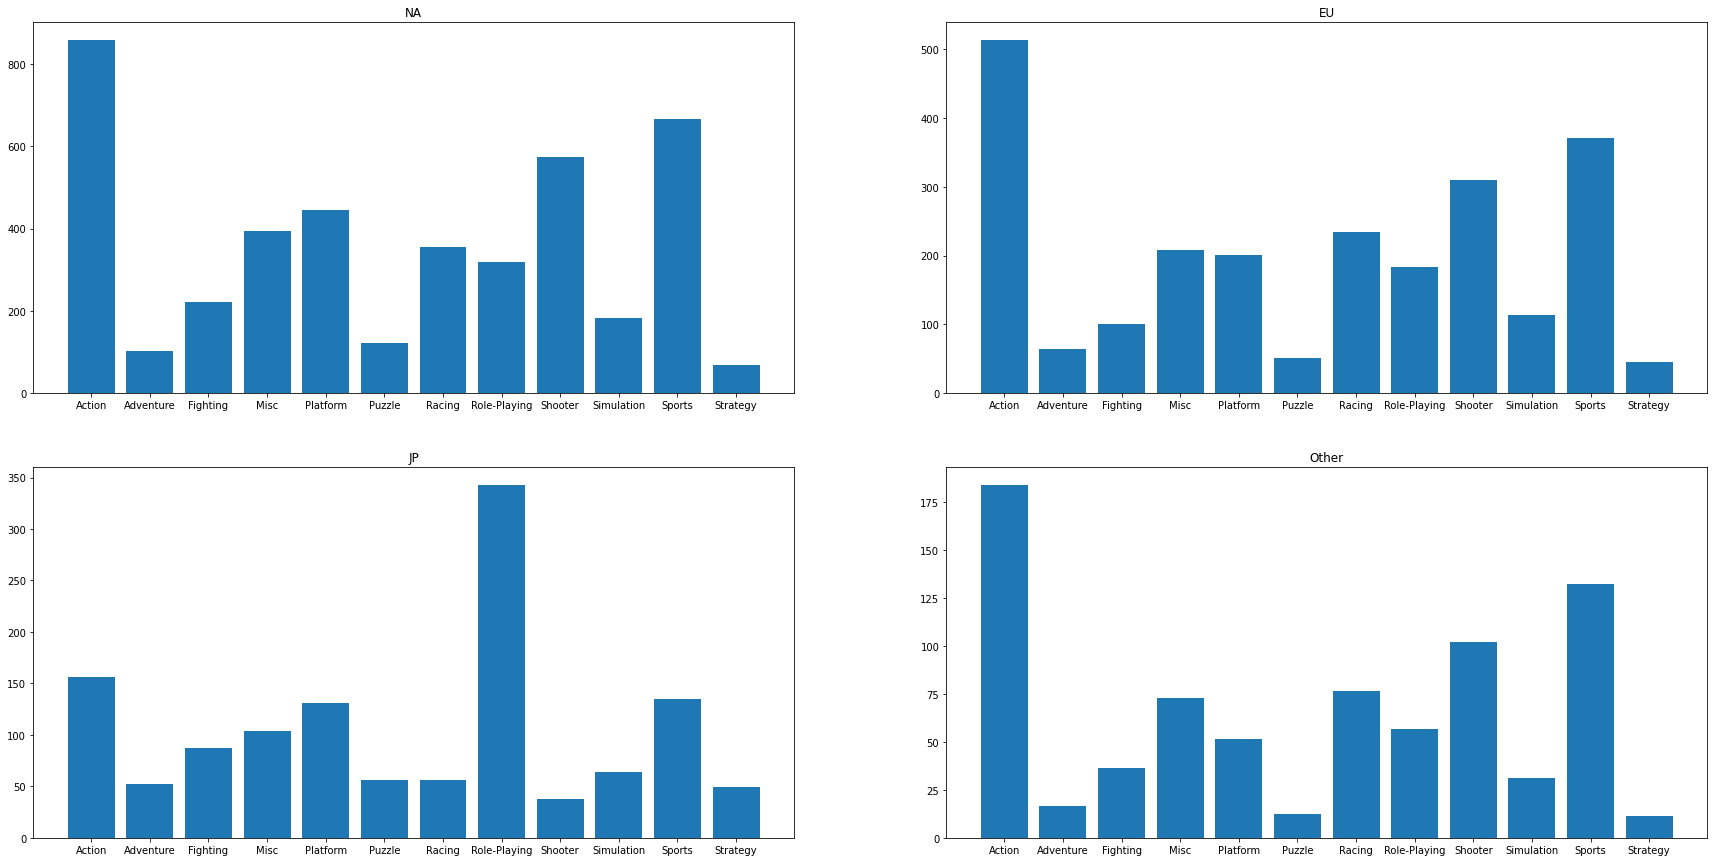

In [59]:
import matplotlib.pyplot as plt
dfg = pd.concat([df2['Genre'], df2.loc[:, 'NA_Sales':'Other_Sales']], axis = 1)
df_gen = dfg.set_index('Genre', inplace=True)
df_gen = dfg.groupby('Genre').sum()

fig, axs = plt.subplots(2, 2, figsize=(30, 15))

axs[0,0].set_title('NA')
axs[0,0].bar(df_gen.index, df_gen['NA_Sales'])
axs[0,1].set_title('EU')
axs[0,1].bar(df_gen.index, df_gen['EU_Sales'])
axs[1,0].set_title('JP')
axs[1,0].bar(df_gen.index, df_gen['JP_Sales'])
axs[1,1].set_title('Other')
axs[1,1].bar(df_gen.index, df_gen['Other_Sales'])